In [75]:
import pymysql
import pandas as pd
from  nltk.corpus import stopwords
from collections import Counter

In [56]:
con = pymysql.connect(host='127.0.0.1',user='root',charset='utf8',db='abc',passwd='1234')
sql = "SELECT text FROM tweets"
df = pd.read_sql(sql,con)
print(df)

                                                   text
0     Unable to obtain any masks amid the #coronavir...
1     #Virus dents #bookings for #IHG; #Japan may lo...
2     #day14 unpack and pack again. No more unpack u...
3     @MtRdefender @rthk_enews What if one of them i...
4     @TwitterMoments Uyghur Muslims, Tibetans, Chri...
...                                                 ...
6172  The Keshe Foundation is trying to help many wi...
6173  Development of vaccine against new #coronaviru...
6174  Breaking News: Multiple US troop casualties af...
6175  Tim Pool: “I’m beginning to think we got a ser...
6176  RT @CoronavirusUpd3: 2/8 #coronavirus \n\nEpoc...

[6177 rows x 1 columns]


In [94]:
words = stopwords.words('english')
for w in ['!',',','.','?','-','&amp','I','The','RT','A','#Cov','This','&amp;','like','Hong','We','one','Kong','#covid19']:
    words.append(w)

In [95]:
#Compute word frequency

text_2 = []
output = []
for context in df['text']:
    text_1 = context.split()
    for word in text_1:
        if word not in words:
            text_2.append(word)
# print(text_2)

c = Counter(text_2)
print(c.most_common()[:30])

[('#coronavirus', 3746), ('#Coronavirus', 1027), ('#COVID19', 992), ('China', 497), ('cases', 455), ('#CoronavirusOutbreak', 423), ('#China', 405), ('people', 391), ('new', 353), ('Chinese', 316), ('outbreak', 299), ('#2019nCoV', 276), ('coronavirus', 264), ('Coronavirus', 239), ('virus', 235), ('#CoronaVirus', 230), ('#Wuhan', 226), ('via', 226), ('confirmed', 221), ('#nCov', 179), ('#Singapore', 177), ('#coronaviruswuhan', 175), ('Singapore', 173), ('#coronavirus.', 170), ('spread', 166), ('know', 165), ('Wuhan', 162), ('could', 156), ('get', 147), ('#virus', 145)]


In [114]:
# sample for sentiment using textblob
# polarity是情感极性，-1代表完全负面，1代表完全正面。subjectivity代表主观性

from textblob import TextBlob

output = []

for context in df['text']:
    blob = TextBlob(context)
    output.append(blob.sentiment)
    
print(output[:10])

[Sentiment(polarity=-0.25, subjectivity=0.25), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.25, subjectivity=0.5), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.0, subjectivity=0.175), Sentiment(polarity=0.2, subjectivity=0.525), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=-0.6, subjectivity=1.0), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.25, subjectivity=0.9)]


In [103]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

(array([  29.,   37.,  161.,  283.,  718., 3642.,  808.,  384.,   57.,
          58.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

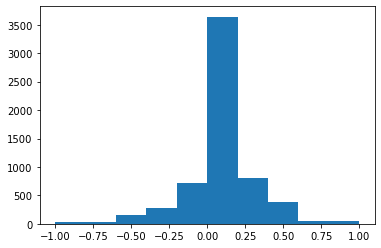

In [113]:
# make a histogram to show sentiment

polarity_list = []
for i in output:
    polarity_list.append(i.polarity)
plt.hist(polarity_list)